largeqsvを再現させます
pythonのテスト

In [1]:
a=1
print(a)


1


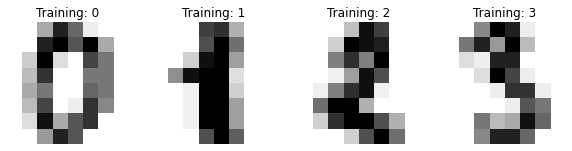

In [3]:
# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause
# base on https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html
# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [4]:
from skqulacs.qsvm import QSVC
from skqulacs.circuit import LearningCircuit
from skqulacs.circuit import create_largeqsv



# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))



n_qubit=8
# QSVC回路を作ります　create_largeqsvでは、8qubit,8層なので72個の入力スロットがあります
#入力可能数が実入力数より多い場合、余った分は実入力の始めのほうが採用されます
#例えば8入力スロットに対して3実入力の場合、01201201になります
circuit = create_largeqsv(n_qubit,8,0.035)
clf = QSVC(circuit)

# Split data into 72% train and 28% test subsets
# 論文では1300件をtrainしていたはず
# len=1797  1797*72%=1293 大体同じ
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.72, shuffle=False
)

# QSVCで学習をさせます
clf.fit(X_train, y_train)

# predictします
predicted = clf.predict(X_test)

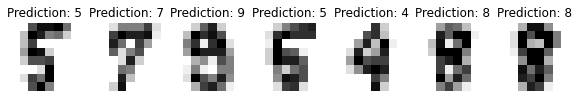

In [5]:
_, axes = plt.subplots(nrows=1, ncols=7, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

Confusion matrix:
[[126   0   0   0   1   0   0   0   0   0]
 [  0 109   5   0   0   0   0   0  16   0]
 [  1   0 114   4   0   0   0   1   0   5]
 [  0   0   2 112   0   3   0   6   4   3]
 [  0   1   0   0 121   0   0   3   0   7]
 [  0   0   0   0   1 116   2   1   0  12]
 [  1   1   0   0   0   0 128   0   0   0]
 [  0   0   3   0   0   1   0 122   2   1]
 [  0   8   3   0   0   4   0   2 104   6]
 [  1  11   0   0   0   2   0   3   2 113]]


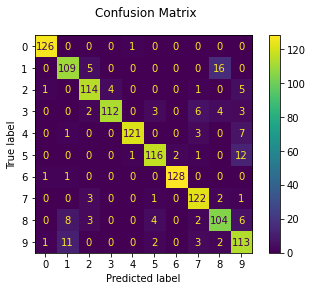

In [6]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [7]:
print(n_samples)

1797
